# Image quality ranking example

This is a simple example for using the image quality ranking functionality in MIPLIB. The principle is the same as in the [PyImageQualityRanking](https://github.com/sakoho81/pyimagequalityranking) package (1), but MIPLIB also contains some additional toys, e.g. Fourier Ring Correlation analysis (2) which makes it possible to expand the image quality calculation a little bit.

As with the PyImageQualityRanking package you can alternatively use this functionality through a command line script. You can read more about that [here](https://github.com/sakoho81/pyimagequalityranking/wiki).

---
(1) Koho, Sami, Elnaz Fazeli, John E. Eriksson, and Pekka E. Hänninen. 2016. “Image Quality Ranking Method for Microscopy.” Scientific Reports 6 (July): 28962.

(2) Koho, S. et al. Fourier ring correlation simplifies image restoration in fluorescence microscopy. Nat. Commun. 10 3103 (2019).

In [39]:
import os
import pandas as pd
import numpy as np

import miplib.ui.cli.miplib_entry_point_options as opts

from miplib.data.io import read
import miplib.processing.image as imops
from miplib.analysis.image_quality import image_quality_ranking as imq
import miplib.data.iterators.fourier_ring_iterators as iterators

# These are just needed to download the data from Figshare if not already available
import urllib.request as dl
import zipfile

## Setup

Here I use the same command line options interface that is used in the *pyimq.main* script. Please refer to the Wiki, or ```pyimq.main --help``` for more details. 

In [2]:
args_list = ("--use-mask --normalize-power --bin-delta=1 " 
             " --resolution-threshold-criterion=fixed --frc-curve-fit-type=smooth-spline ").split()

options = opts.get_quality_script_options(args_list)

Check that the data directory exists, and if not, download the data from Figshare

In [3]:
path = os.path.join(os.getcwd(), "Image_Quality_Ranking_Data")

if not os.path.exists(path):
    os.mkdir(path)
    zip_path = os.path.join(path, "images.zip")
    dl.urlretrieve("https://ndownloader.figshare.com/files/20749572", zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(path)


## Run

Now we are ready to run the script. 

In [85]:
df = imq.batch_evaluate_image_quality(path, options)

Done analyzing Detector_1_STED_100perc.tif
Done analyzing Detector_1_STED_50perc.tif
Done analyzing Detector_1_STED_60perc.tif
Done analyzing Detector_1_STED_70perc.tif
Done analyzing Detector_1_STED_80perc.tif
Done analyzing Detector_1_STED_90perc.tif
Done analyzing Detector_2_STED_100perc.tif
Done analyzing Detector_2_STED_50perc.tif
Done analyzing Detector_2_STED_60perc.tif
Done analyzing Detector_2_STED_70perc.tif
Done analyzing Detector_2_STED_80perc.tif
Done analyzing Detector_2_STED_90perc.tif


## Evaluate

The data is saved into a Pandas DataFrame. Let's first check what it looks like. There are only a few images in the dataset, so the default print will work. I would recommend *df.describe()* for anyting more involved.

In [86]:
df

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,Kurtosis,MeanBin,Resolution
0,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_100perc.tif,4.285611,43180262.0,49.344954,10328.350177,198.187984,5.094598,3.441091e+07,10247.090423,-0.039543,-0.272079,10530.424537,0.119985
1,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_50perc.tif,4.730817,54573467.0,36.565536,10099.634840,193.568316,5.062354,3.441091e+07,10045.522567,0.016194,-0.171923,10003.404877,0.164919
2,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_60perc.tif,4.795810,54982596.0,37.439599,10120.469787,181.443549,5.195893,3.441091e+07,10114.066394,0.070219,-0.291461,10289.242332,0.158282
3,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_70perc.tif,4.603168,48760263.0,42.567657,10274.365860,213.621519,5.085422,3.441091e+07,10226.728254,-0.115382,-0.338652,10392.621445,0.139546
4,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_80perc.tif,4.580109,50641291.0,41.937592,10184.757844,182.145878,5.039310,3.441091e+07,10189.336215,0.138788,-0.254724,10402.966292,0.135971
5,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_90perc.tif,4.367668,45722663.0,46.243127,10275.311030,178.514408,5.127605,3.441091e+07,10208.036749,-0.066109,-0.215196,10439.145446,0.127693
6,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_100perc.tif,3.215201,28964592.0,78.310588,60353.834168,1082.283004,5.223152,3.441091e+07,60205.023895,-0.024671,-0.454378,59927.386978,0.149342
7,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_50perc.tif,3.605043,34375844.0,59.983093,55074.975164,989.126724,5.047844,3.441091e+07,54802.091433,-0.036091,-0.196196,53827.973087,0.189043
8,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_60perc.tif,3.578477,34131927.0,61.658737,55671.798799,955.466877,4.962645,3.441091e+07,55324.291588,0.210412,0.311979,56439.283505,0.172909
9,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_70perc.tif,3.624614,34195793.0,60.299502,54478.888632,983.583022,5.041294,3.441091e+07,54339.532782,0.245611,0.202735,55003.158593,0.157665


The *batch_evaluate_image_quality()* function does not normalize the numerical values to [0, 1], so you have to do that separately, if thats what you want. Here's an example for getting that done.

In [87]:
df_norm = df.copy()
df_norm.iloc[:, 1:] = df.iloc[:, 1:].subtract(df.iloc[:, 1:].min(), axis=1)
df_norm.iloc[:, 1:] = df_norm.iloc[:, 1:].divide(df_norm.iloc[:, 1:].max(), axis=1)

## The resolution has to be flipped around to make sense. Do the same, e.g. tp get the invfSTD measure 
df_norm["Resolution"] = 1 - df_norm["Resolution"]

## Utilize

As a simple example here, I take a couple of parameters (Resolution and Spatial entropy) that are well known to correlate with image quality. Then I create a third parameter, by simply taking an average of the two. The images are clearly divided in two groups. On this normalized scale each paramter gets its maximum (best) value at 1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028EB7F55C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028EB7FBD5C0>]], dtype=object)

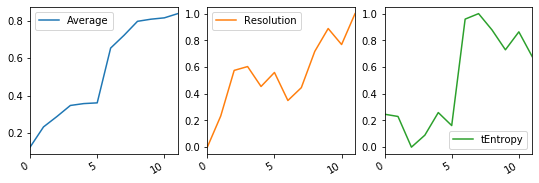

In [88]:
df_norm["Average"] = (df_norm["tEntropy"] + df_norm["Resolution"]) / 2

df_res = df_norm.sort_values(by=['Average']).reset_index(drop=True)
df_res = df_res.loc[:, ["Average", "Resolution", "tEntropy"]]
                            
df_res.plot(subplots=True, layout=(1,3), figsize=(9,3))

So let's look, what does that mean. As it turns out, the ranking separates the two detectors that the data was acquired with. 

In [89]:
pd.set_option('display.max_colwidth', -1)

df_check = df_norm.sort_values(by=['Average']).reset_index(drop=True)
df_check = df_check.loc[:, ["Filename", "Average", "Resolution", "tEntropy"]]

df_check

,Filename,Average,Resolution,tEntropy
0,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_50perc.tif,0.123320,0.000000,0.246641
1,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_60perc.tif,0.231730,0.233628,0.229833
2,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_100perc.tif,0.287446,0.574893,0.000000
3,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_90perc.tif,0.346634,0.603514,0.089754
4,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_70perc.tif,0.356695,0.454367,0.259022
5,c:\Temp\Image_Quality_Ranking_Data\Detector_2_STED_80perc.tif,0.360555,0.559342,0.161767
6,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_50perc.tif,0.654102,0.349322,0.958881
7,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_60perc.tif,0.722721,0.445443,1.000000
8,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_70perc.tif,0.797436,0.716750,0.878121
9,c:\Temp\Image_Quality_Ranking_Data\Detector_1_STED_90perc.tif,0.808761,0.888393,0.729129
